In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('data')

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


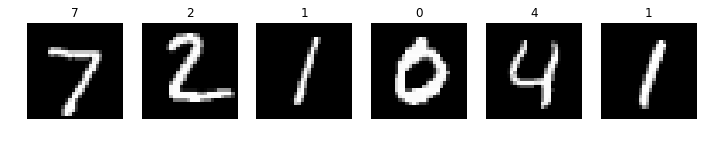

In [3]:
def draw_image(images, labels):
    fig, axes = plt.subplots(1, len(images), figsize=(len(images) * 2, 2))
    for i, ax in enumerate(axes.flat):
        ax.set_axis_off()
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(labels[i])
    plt.show()

draw_image(mnist.test.images[:6], mnist.test.labels[:6])

In [4]:
# https://www.tensorflow.org/api_docs/python/tf/contrib/layers/fully_connected

def layer(x, out_size, activation):
    return tf.contrib.layers.fully_connected(x, out_size, activation)

In [5]:
x = tf.placeholder(tf.float32, [None, 14 * 28])

xx = tf.reshape(x, [-1, 14, 28])

xx.shape

TensorShape([Dimension(None), Dimension(14), Dimension(28)])

In [6]:
inputs = tf.unstack(xx, 14, axis=1)

inputs

[<tf.Tensor 'unstack:0' shape=(?, 28) dtype=float32>,
 <tf.Tensor 'unstack:1' shape=(?, 28) dtype=float32>,
 <tf.Tensor 'unstack:2' shape=(?, 28) dtype=float32>,
 <tf.Tensor 'unstack:3' shape=(?, 28) dtype=float32>,
 <tf.Tensor 'unstack:4' shape=(?, 28) dtype=float32>,
 <tf.Tensor 'unstack:5' shape=(?, 28) dtype=float32>,
 <tf.Tensor 'unstack:6' shape=(?, 28) dtype=float32>,
 <tf.Tensor 'unstack:7' shape=(?, 28) dtype=float32>,
 <tf.Tensor 'unstack:8' shape=(?, 28) dtype=float32>,
 <tf.Tensor 'unstack:9' shape=(?, 28) dtype=float32>,
 <tf.Tensor 'unstack:10' shape=(?, 28) dtype=float32>,
 <tf.Tensor 'unstack:11' shape=(?, 28) dtype=float32>,
 <tf.Tensor 'unstack:12' shape=(?, 28) dtype=float32>,
 <tf.Tensor 'unstack:13' shape=(?, 28) dtype=float32>]

In [7]:
len(inputs)

14

In [8]:
inputs[0].shape

TensorShape([Dimension(None), Dimension(28)])

In [9]:
# https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/BasicLSTMCell
# https://www.tensorflow.org/api_docs/python/tf/nn/static_rnn

def rnn(x, batches, in_size, out_size):
    # list로 분리
    xx = tf.reshape(x, [-1, batches, in_size])
    inputs = tf.unstack(xx, batches, axis=1)

    # Cell 초기화
    cell = tf.contrib.rnn.BasicLSTMCell(out_size)

    # 순환
    outputs, states = tf.contrib.rnn.static_rnn(cell, inputs, dtype=tf.float32)

    # list를 하나로 합침
    output = tf.concat(outputs, axis=1)
    return tf.reshape(output, [-1, batches * out_size])

In [10]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 14 * 28])
y = tf.placeholder(tf.float32, [None, 14 * 28])

keep_prob = tf.placeholder(tf.float32)

z1 = rnn(x, 14, 28, 200)
z2 = layer(z1, 500, tf.nn.relu)
drop = tf.nn.dropout(z2, keep_prob)
z = layer(drop, 14 * 28, tf.nn.sigmoid)

loss = -tf.reduce_mean(y * tf.log(z) + (1 - y) * tf.log(1 - z))

train = tf.train.AdamOptimizer(0.0001).minimize(loss)

In [11]:
test_data = {
    x: mnist.test.images,
    y: mnist.test.labels
}

def draw():
    shuffle = np.random.permutation(mnist.test.labels.shape[0])

    labels = mnist.test.labels[shuffle][:5]
    images1 = mnist.test.images[:, :14 * 28][shuffle][:5]
    images2 = session.run(z, feed_dict={ x: images1, keep_prob: 1.0 })
    images = np.concatenate([images1, images2], axis=1)

    draw_image(images, labels)

1


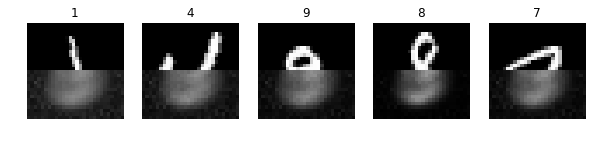

2


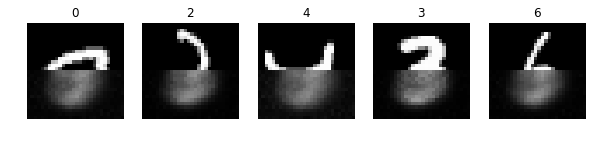

3


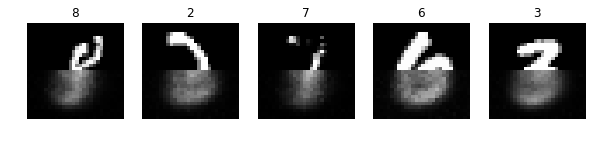

4


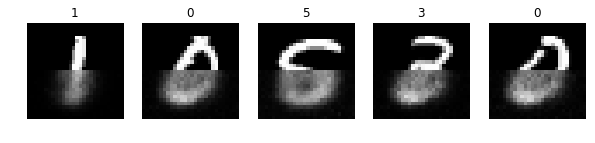

5


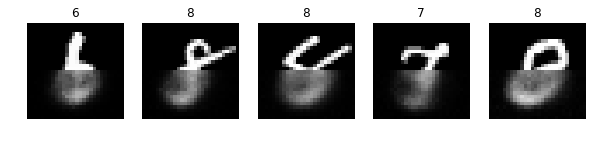

6


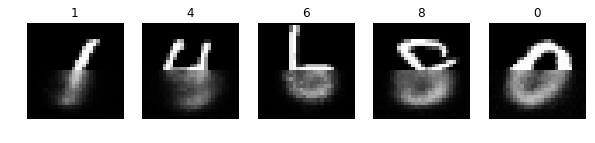

7


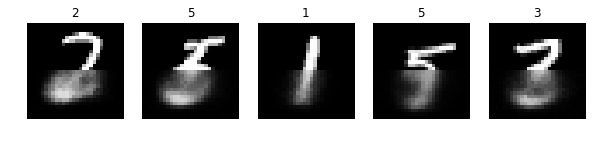

8


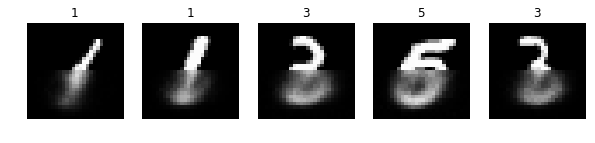

9


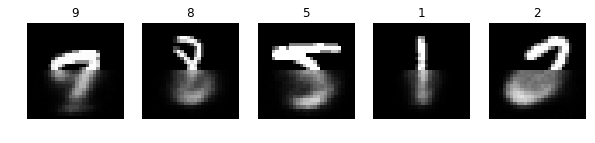

10


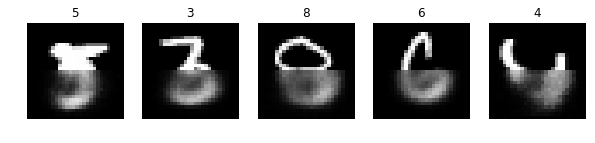

In [12]:
session = tf.Session()
session.run(tf.global_variables_initializer())

batch_size = 100

for i in range(10):
    print(i + 1)
    for j in range(100):
        images, labels = mnist.train.next_batch(batch_size)
        parts = np.split(images, 2, axis=1)
        data = {
            x: parts[0],
            y: parts[1],
            keep_prob: 0.5
        }
        session.run(train, feed_dict=data)
    draw()

[텍스트의 통계학: (2) 셰익스피어의 영혼은 몇 그램?](http://nullmodel.egloos.com/1956967)

In [13]:
import re

# Windows에서는 encoding을 반드시 써야 함.
with open('data.txt', encoding='utf-8') as f:
    read_data = f.read()

# 공백 제거
# text = re.sub('\s+', '', read_data)

# 줄 넘김만 제거하고 공백 유지
text = read_data.replace('\n', ' ')
text = re.sub('\s+', '_', text)

text

'손_닿을_수_없는_저기_어딘가_오늘도_넌_숨쉬고_있지만_너와_머물던_작은_의자_위엔_같은_모습의_바람이_지나네_너는_떠나며_마치_날_떠나가듯이_멀리_손을_흔들며_언젠간_추억에_남겨져_갈_거라고_그리워하면_언젠간_만나게_되는_어느_영화와_같은_일들이_이루어져_가기를_힘겨워한_날에_너를_지킬_수_없었던_아름다운_시절_속에_머문_그대이기에_너는_떠나며_마치_날_떠나가듯이_멀리_손을_흔들며_언젠간_추억에_남겨져_갈_거라고_그리워하면_언젠간_만나게_되는_어느_영화와_같은_일들이_이루어져_가기를_힘겨워한_날에_너를_지킬_수_없었던_아름다운_시절_속에_머문_그대여_그리워하면_언젠간_만나게_되는_어느_영화와_같은_일들이_이루어져_가기를_힘겨워한_날에_너를_지킬_수_없었던_아름다운_시절_속에_머문_그대이기에_'

In [14]:
chars = list(set(text))

np.array(chars)

array(['만', '모', '치', '화', '었', '오', '느', '을', '가', '들', '있', '문', '엔',
       '남', '와', '속', '며', '영', '추', '손', '루', '힘', '젠', '게', '듯', '아',
       '늘', '멀', '다', '는', '일', '너', '없', '워', '운', '날', '기', '던', '겨',
       '에', '자', '리', '람', '라', '름', '흔', '도', '_', '면', '이', '하', '한',
       '여', '머', '억', '그', '갈', '쉬', '킬', '져', '같', '고', '거', '지', '절',
       '바', '닿', '간', '의', '저', '떠', '대', '숨', '은', '작', '나', '언', '수',
       '물', '시', '네', '되', '어', '마', '위', '습', '딘', '를', '넌'],
      dtype='<U1')

In [15]:
num_chars = len(chars)
num_inputs = 10

num_chars

89

In [16]:
x_data = []
y_data = []

for i in range(len(text) - num_inputs):
    x_data.append([chars.index(x) for x in list(text[i:i + num_inputs])])
    y_data.append(chars.index(text[i + num_inputs]))

x_data = np.array(x_data)
y_data = np.array(y_data)

x_data.shape, y_data.shape

((382, 10), (382,))

In [17]:
tf.reset_default_graph()

x = tf.placeholder(tf.int64, [None, num_inputs])
y = tf.placeholder(tf.int64, [None])

keep_prob = tf.placeholder(tf.float32)

xx = tf.one_hot(x, num_chars)
yy = tf.one_hot(y, num_chars)

z1 = rnn(xx, num_inputs, num_chars, 50)
z2 = layer(z1, 100, tf.nn.relu)
drop = tf.nn.dropout(z2, keep_prob)
z = layer(drop, num_chars, tf.nn.softmax)

label = tf.argmax(z, axis=1)

loss = -tf.reduce_mean(yy * tf.log(z))

train = tf.train.AdamOptimizer(0.0001).minimize(loss)

In [18]:
session = tf.Session()
session.run(tf.global_variables_initializer())

def generate():
    inputs = [chars.index(x) for x in list('오늘도_넌_숨쉬고_있지만')]
    for i in range(50):
        output = session.run(label, feed_dict={
            x: [inputs[-num_inputs:]],
            keep_prob: 1.0
        })
        inputs = np.hstack([inputs, output])
    print(''.join(chars[x] for x in inputs.tolist()))

data = {
    x: x_data,
    y: y_data,
    keep_prob: 0.5
}

for i in range(10):
    print(i + 1)
    for j in range(200):
        session.run(train, feed_dict=data)
    generate()

1
오늘도_넌_숨쉬고_있지만__________________________________________________
2
오늘도_넌_숨쉬고_있지만__________________________________________________
3
오늘도_넌_숨쉬고_있지만__________________________________________________
4
오늘도_넌_숨쉬고_있지만____나_____________________________________________
5
오늘도_넌_숨쉬고_있지만____머던__________던던던아아__________던던던아아__________던던던아
6
오늘도_넌_숨쉬고_있지만____머던던__________던던던던아아운__________던던던던아아운_________
7
오늘도_넌_숨쉬고_있지만__와_머물던__은__들____어_____던던던아아아운__________었었던던던아운운__
8
오늘도_넌_숨쉬고_있지만_너와_머물던_작은_의자_위엔_은은_모습의_____지나나_었었는_________었었었던던아
9
오늘도_넌_숨쉬고_있지만_너와_머물던_작은_의자_위엔_같은_모습의_바람이_지나네_너는_떠나며_마치_날_떠나가듯이_
10
오늘도_넌_숨쉬고_있지만_너와_머물던_작은_의자_위엔_같은_모습의_바람이_지나네_너는_떠나며_마치_날_떠나가듯이_
